In [4]:
# Import Functions
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Adjust the path as needed
file_path = r"C:\Users\HP\Desktop\New folder\Copper_Set (1).xlsx"

# Read the Excel file
df = pd.read_excel(file_path)

# Display the dataframe
df


,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00


In [6]:
# to know thw unique values
for i in list(df.columns):
    print(f"{i} : {df[i].nunique()}")

id : 181671
item_date : 252
quantity tons : 181673
customer : 1169
country : 17
status : 9
item type : 7
application : 30
thickness : 594
width : 1386
material_ref : 16563
product_ref : 33
delivery date : 28
selling_price : 9795


In [7]:
df.shape

(181673, 14)

In [8]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [9]:
df.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [11]:
# dealing with data in wrong format,for categorical variables

df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce')
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
df['customer'] = pd.to_numeric(df['customer'], errors='coerce')
df['country'] = pd.to_numeric(df['country'], errors='coerce')
df['thickness'] = pd.to_numeric(df['thickness'], errors='coerce')
df['width'] = pd.to_numeric(df['width'], errors='coerce')
df['material_ref'] = df['material_ref'].str.lstrip('0')
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce')
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')
df['delivery_date_dif']=(df['delivery date']-df['item_date']).dt.days


In [68]:
df['item_date'].min()

Timestamp('2020-07-02 00:00:00')

In [69]:
df['item_date'].max()

Timestamp('2021-04-01 00:00:00')

In [70]:
df['delivery date'].min()

Timestamp('2019-04-01 00:00:00')

In [71]:
df['delivery date'].max()

Timestamp('2022-01-01 00:00:00')

In [12]:
df.sample(3)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,delivery_date_dif
159315,8F8EF8F7-563D-4D36-AFC5-D8B1F408F0E7,2020-08-11,27.409093,30198826.0,25.0,Not lost for AM,W,15.0,3.0,1000.0,NaN,1671863738,2020-10-01,586.0,51.0
157788,E397C9D0-4AAF-4225-AD57-12F02825D879,2020-08-17,105.455080,30223403.0,78.0,Won,S,10.0,6.0,1500.0,NaN,640665,2020-08-01,622.0,-16.0
41683,6D3C634D-8CC9-4ED9-AA4F-91789DF7FF12,2021-02-10,157.366605,30201046.0,26.0,Lost,S,59.0,3.0,1270.0,NaN,1670798778,2021-01-01,629.0,-40.0


In [13]:
df.shape

(181673, 15)

In [14]:
df.dtypes

id                           object
item_date            datetime64[ns]
quantity tons               float64
customer                    float64
country                     float64
status                       object
item type                    object
application                 float64
thickness                   float64
width                       float64
material_ref                 object
product_ref                   int64
delivery date        datetime64[ns]
selling_price               float64
delivery_date_dif           float64
dtype: object

In [15]:
# Data preprocessing some material values starts in OOOO also convert thos into Nan
df['material_ref'] = df['material_ref'].apply(lambda x: np.nan if str(x).startswith('00000') else x)
df.isnull().sum()

id                       2
item_date                3
quantity tons            1
customer                 1
country                 28
status                   2
item type                0
application             24
thickness                1
width                    0
material_ref         77919
product_ref              0
delivery date            3
selling_price            1
delivery_date_dif        6
dtype: int64

In [16]:
df.describe().T # Descriptive analysis

,count,mean,min,25%,50%,75%,max,std
item_date,181670,2020-11-26 22:56:58.127374080,2020-07-02 00:00:00,2020-09-29 00:00:00,2020-11-30 00:00:00,2021-02-03 00:00:00,2021-04-01 00:00:00,NaN
quantity tons,181672.0,5874.925754,-2000.0,10.970298,30.364635,67.160612,1000000000.0,2349081.241674
customer,181672.0,30512209.027968,12458.0,30196884.0,30205242.0,30280416.0,2147483647.0,24333815.584025
country,181645.0,44.893022,25.0,26.0,30.0,78.0,113.0,24.404214
application,181649.0,25.615809,2.0,10.0,15.0,41.0,99.0,17.754175
thickness,181672.0,2.564827,0.18,0.7,1.5,3.0,2500.0,6.572321
width,181673.0,1295.286724,1.0,1180.0,1250.0,1500.0,2990.0,261.631754
product_ref,181673.0,473967910.724318,611728.0,611993.0,640665.0,1332077137.0,1722207579.0,717510064.710402
delivery date,181670,2021-01-25 22:44:26.223372032,2019-04-01 00:00:00,2020-11-01 00:00:00,2021-01-01 00:00:00,2021-04-01 00:00:00,2022-01-01 00:00:00,NaN
selling_price,181672.0,1918.035505,-1160.0,669.0,812.0,953.0,100001015.0,331795.642555


In [17]:
df['quantity tons']=df['quantity tons'].apply(lambda x: np.nan if x<=0 else x)
df['selling_price']=df['selling_price'].apply(lambda x: np.nan if x<=0 else x)
df['delivery_date_dif']=df['delivery_date_dif'].apply(lambda x: np.nan if x<=0 else x)
df.describe().T

,count,mean,min,25%,50%,75%,max,std
item_date,181670,2020-11-26 22:56:58.127374080,2020-07-02 00:00:00,2020-09-29 00:00:00,2020-11-30 00:00:00,2021-02-03 00:00:00,2021-04-01 00:00:00,NaN
quantity tons,181668.0,5875.066247,0.00001,10.971217,30.365013,67.161335,1000000000.0,2349107.102735
customer,181672.0,30512209.027968,12458.0,30196884.0,30205242.0,30280416.0,2147483647.0,24333815.584025
country,181645.0,44.893022,25.0,26.0,30.0,78.0,113.0,24.404214
application,181649.0,25.615809,2.0,10.0,15.0,41.0,99.0,17.754175
thickness,181672.0,2.564827,0.18,0.7,1.5,3.0,2500.0,6.572321
width,181673.0,1295.286724,1.0,1180.0,1250.0,1500.0,2990.0,261.631754
product_ref,181673.0,473967910.724318,611728.0,611993.0,640665.0,1332077137.0,1722207579.0,717510064.710402
delivery date,181670,2021-01-25 22:44:26.223372032,2019-04-01 00:00:00,2020-11-01 00:00:00,2021-01-01 00:00:00,2021-04-01 00:00:00,2022-01-01 00:00:00,NaN
selling_price,181665.0,1918.124252,0.1,669.0,812.0,953.0,100001015.0,331802.034663


In [18]:
df.info() # Information about the data non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   id                 181671 non-null  object        
 1   item_date          181670 non-null  datetime64[ns]
 2   quantity tons      181668 non-null  float64       
 3   customer           181672 non-null  float64       
 4   country            181645 non-null  float64       
 5   status             181671 non-null  object        
 6   item type          181673 non-null  object        
 7   application        181649 non-null  float64       
 8   thickness          181672 non-null  float64       
 9   width              181673 non-null  float64       
 10  material_ref       103754 non-null  object        
 11  product_ref        181673 non-null  int64         
 12  delivery date      181670 non-null  datetime64[ns]
 13  selling_price      181665 non-null  float64 

In [19]:
df.isnull().sum() # to find the null values

id                       2
item_date                3
quantity tons            5
customer                 1
country                 28
status                   2
item type                0
application             24
thickness                1
width                    0
material_ref         77919
product_ref              0
delivery date            3
selling_price            8
delivery_date_dif    16573
dtype: int64

In [20]:
# Filling the missing value to unknown
df['material_ref'].fillna('unknown', inplace=True)

In [21]:
# Filling the unkown values into median valye of the column
df['status'].fillna(df['status'].mode().iloc[0],inplace=True)

df['quantity tons'].fillna(df['quantity tons'].median(),inplace=True)
df['customer'].fillna(df['customer'].median(),inplace=True)
df['country'].fillna(df['country'].median(),inplace=True)
df['application'].fillna(df['application'].median(),inplace=True)
df['thickness'].fillna(df['thickness'].median(),inplace=True)
df['selling_price'].fillna(df['selling_price'].median(),inplace=True)
df['delivery_date_dif'].fillna(df['delivery_date_dif'].median(),inplace=True)

In [22]:
df['id'].fillna('unknown', inplace=True)

In [23]:
df.isnull().sum()

id                   0
item_date            3
quantity tons        0
customer             0
country              0
status               0
item type            0
application          0
thickness            0
width                0
material_ref         0
product_ref          0
delivery date        3
selling_price        0
delivery_date_dif    0
dtype: int64

In [24]:
df=df.dropna()

In [25]:
df.shape

(181667, 15)

<Axes: >

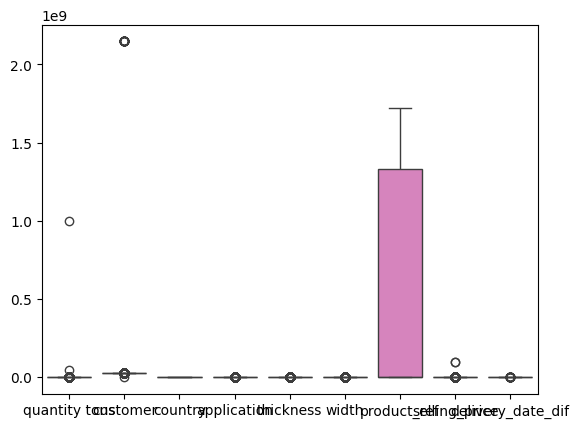

In [26]:
sns.boxplot(data = df) # boxplot to know the Outliers

In [27]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
item_date,181667,2020-11-26 22:56:12.883352832,2020-07-02 00:00:00,2020-09-29 00:00:00,2020-11-30 00:00:00,2021-02-03 00:00:00,2021-04-01 00:00:00,NaN
quantity tons,181667.0,5875.097629,0.00001,10.971048,30.365013,67.159736,1000000000.0,2349113.568144
customer,181667.0,30512215.589904,12458.0,30196884.0,30205242.0,30280416.0,2147483647.0,24334150.416962
country,181667.0,44.890751,25.0,26.0,30.0,78.0,113.0,24.403037
application,181667.0,25.614448,2.0,10.0,15.0,41.0,99.0,17.753182
thickness,181667.0,2.564867,0.18,0.7,1.5,3.0,2500.0,6.572405
width,181667.0,1295.285308,1.0,1180.0,1250.0,1500.0,2990.0,261.63541
product_ref,181667.0,473973462.089174,611728.0,611993.0,640665.0,1332077137.0,1722207579.0,717512632.039963
delivery date,181667,2021-01-25 22:43:35.259788544,2019-04-01 00:00:00,2020-11-01 00:00:00,2021-01-01 00:00:00,2021-04-01 00:00:00,2022-01-01 00:00:00,NaN
selling_price,181667.0,1918.108117,0.1,669.0,812.0,953.0,100001015.0,331800.208249


In [28]:
df.shape

(181667, 15)

In [29]:
df.isnull().sum()

id                   0
item_date            0
quantity tons        0
customer             0
country              0
status               0
item type            0
application          0
thickness            0
width                0
material_ref         0
product_ref          0
delivery date        0
selling_price        0
delivery_date_dif    0
dtype: int64

In [30]:
df['status'].unique() # Know about the unique values

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable'], dtype=object)

In [31]:
df['item type'].unique() # Know about the unique values

array(['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR'], dtype=object)

In [32]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,delivery_date_dif
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,91.0
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00,66.0
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33,66.0
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00,66.0
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00,66.0


In [33]:
# To know about the skewness of the data

from scipy.stats import skew

for col in['quantity tons','customer','country','application','thickness','width','product_ref','selling_price','delivery_date_dif']:
    print(col)
    print(skew(df[col]))


quantity tons
424.6802968326369
customer
86.98315321812876
country
0.753830169100472
application
0.7245353442363361
thickness
303.44092085124925
width
0.37460339270375115
product_ref
1.0151879646079476
selling_price
301.3806226815416
delivery_date_dif
0.3478360472717465


In [33]:
# find outliers - box plot & skewed data - hist plot and violin plot

def plot(df, column):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,3,2)
    sns.histplot(data=df, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')

    plt.subplot(1,3,3)
    sns.violinplot(data=df, x=column)
    plt.title(f'Violin Plot for {column}')
    plt.show()

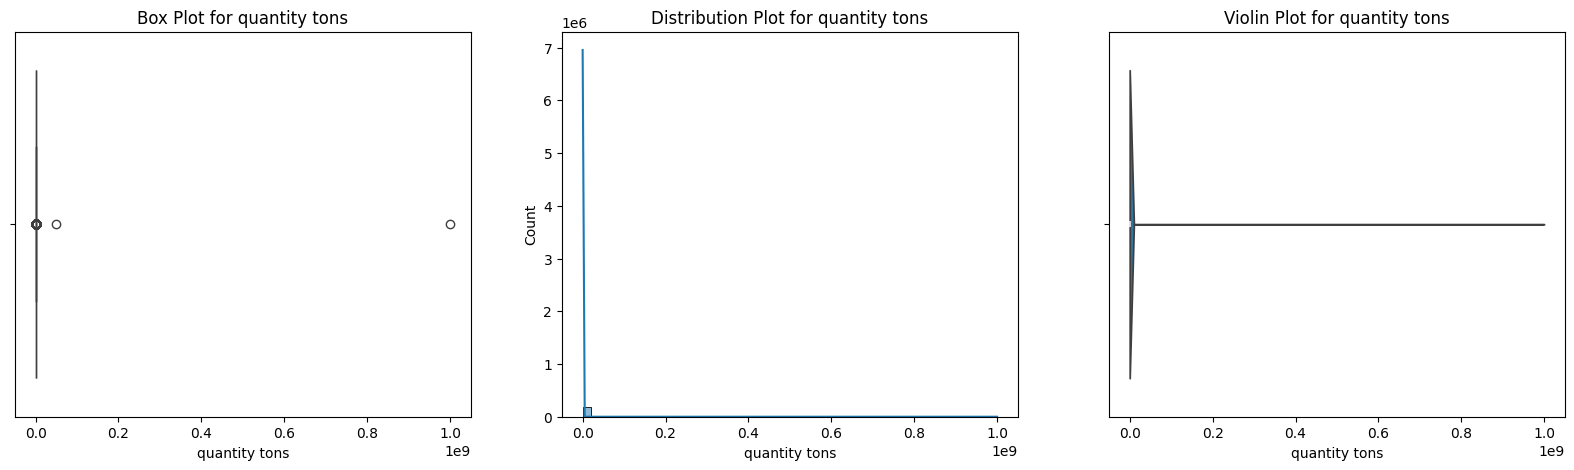

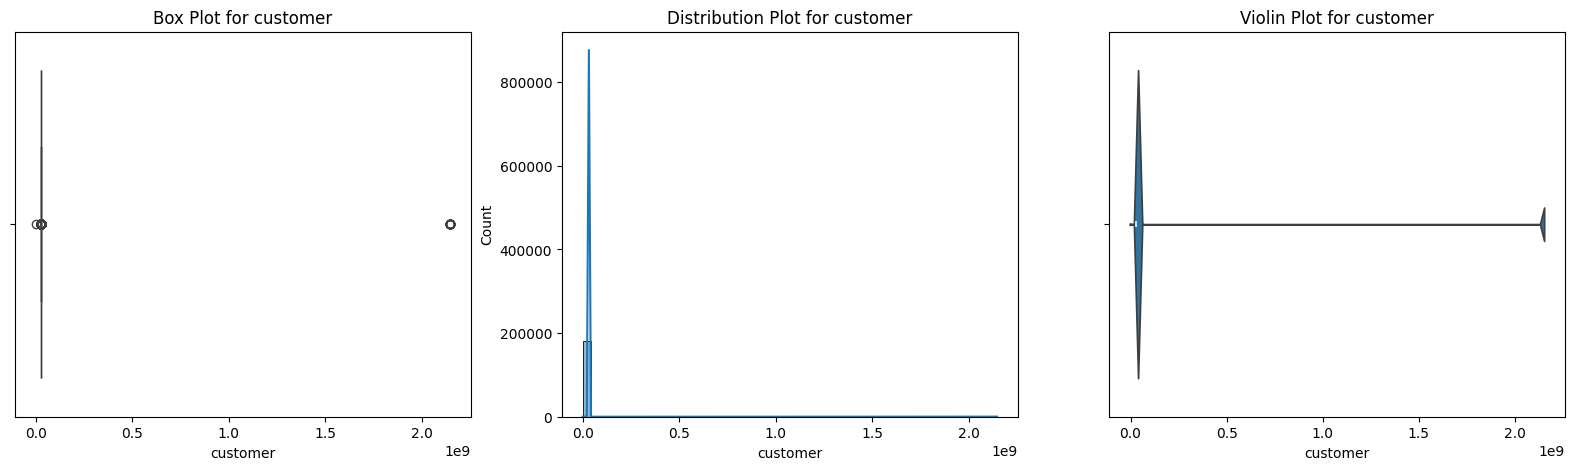

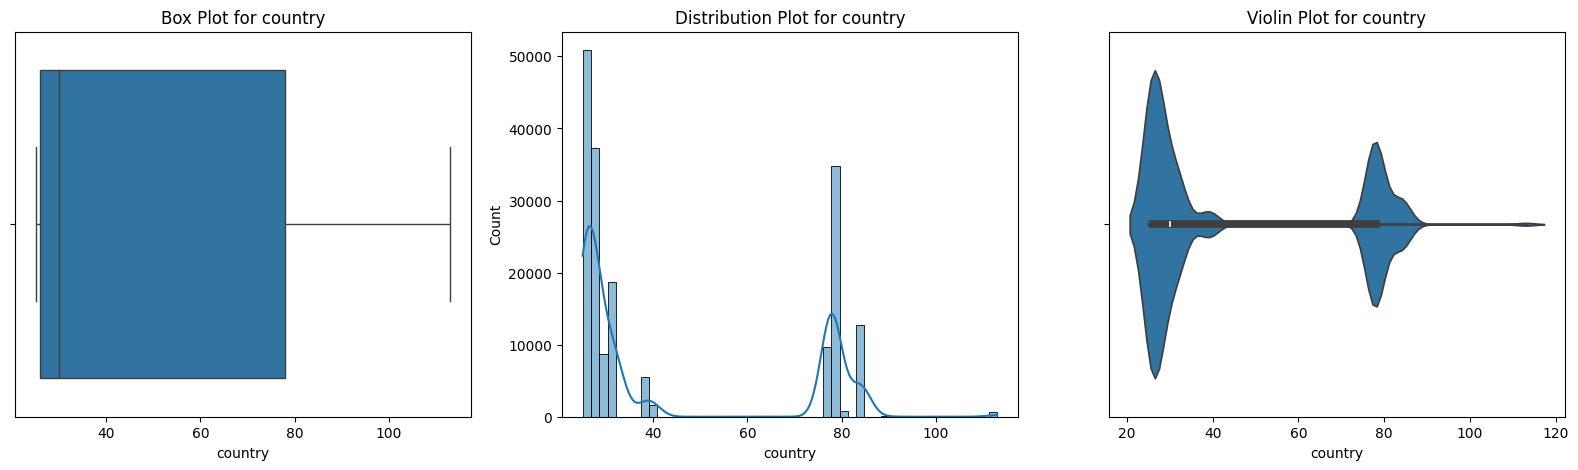

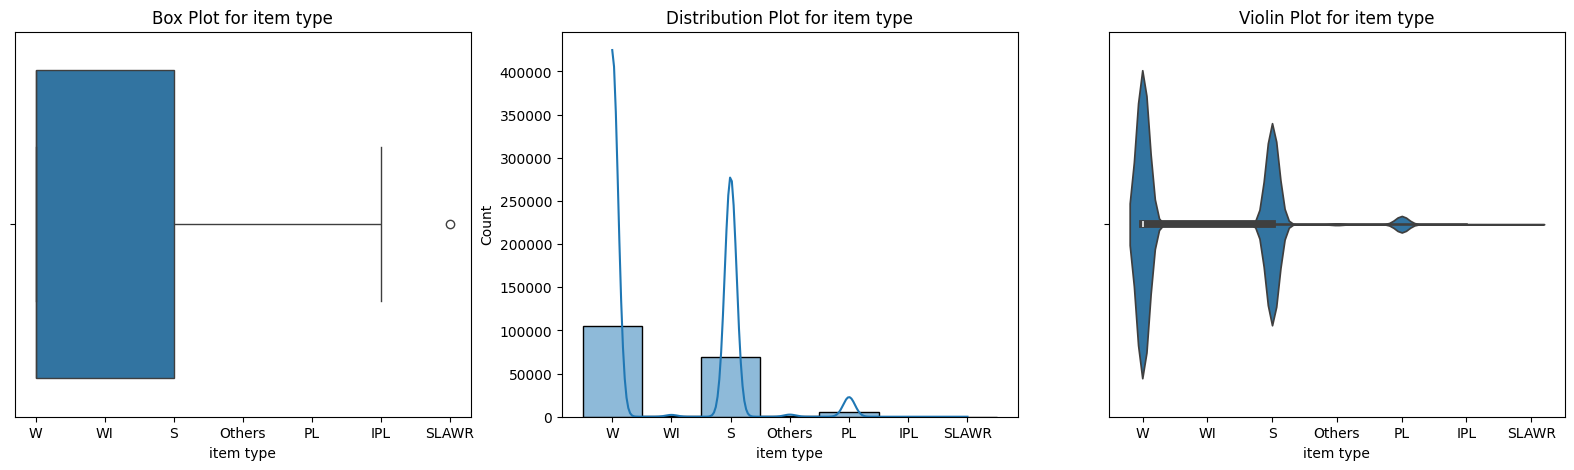

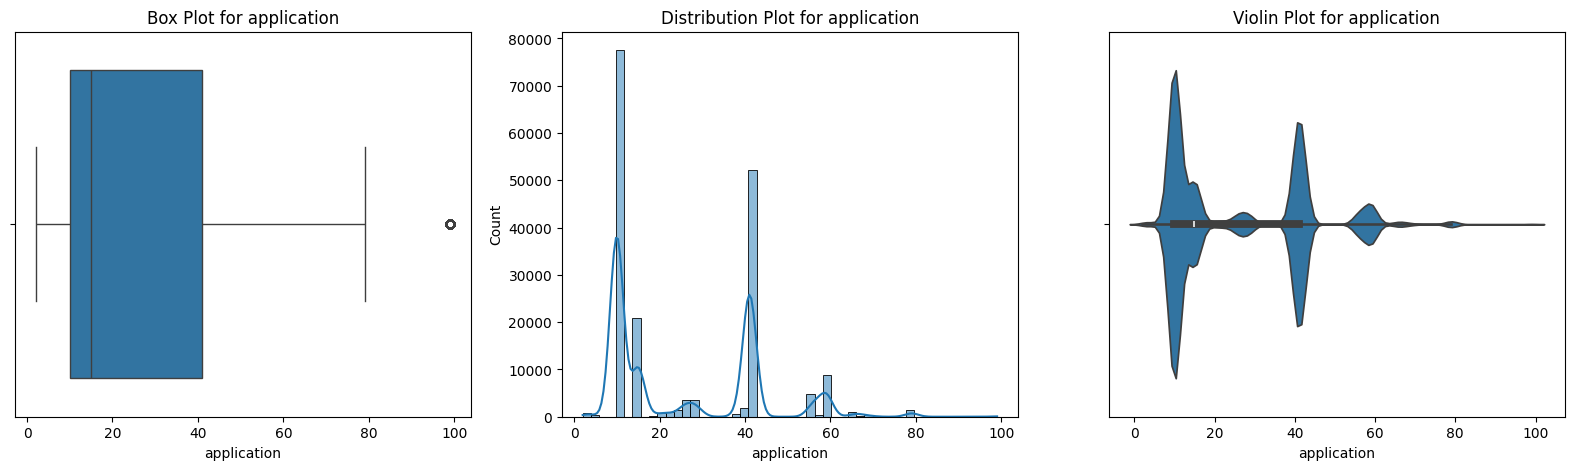

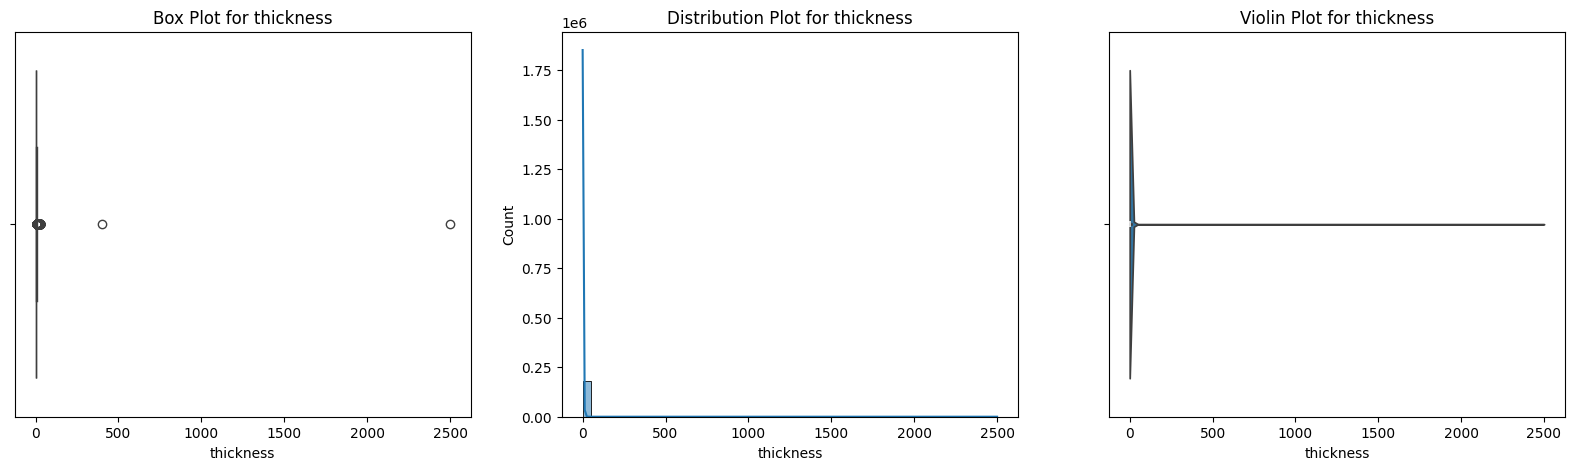

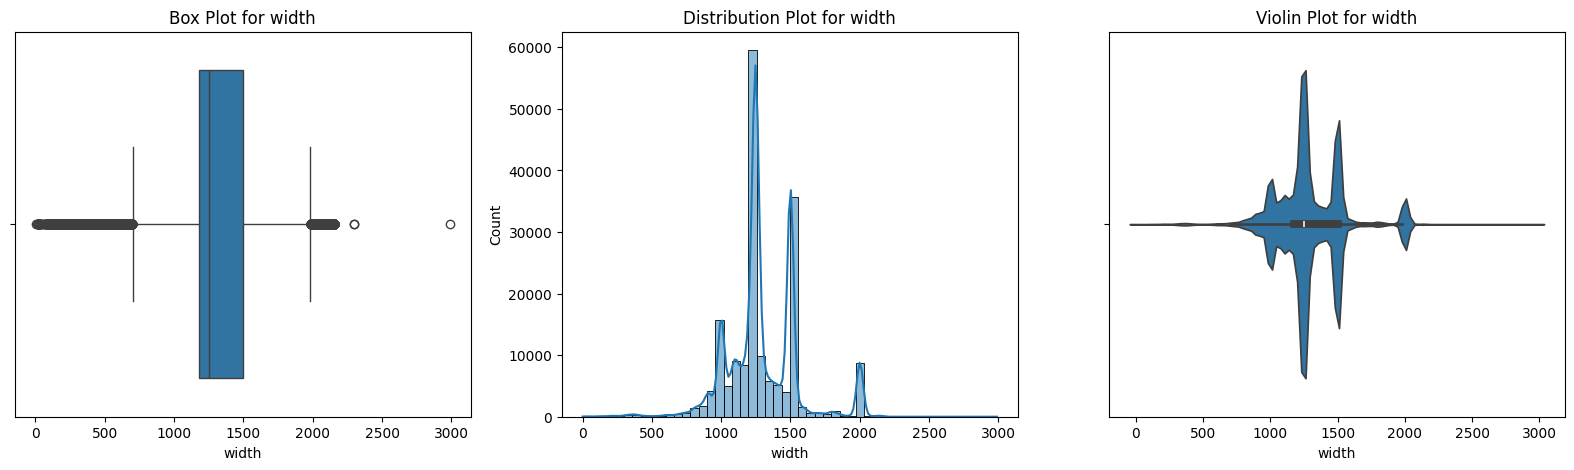

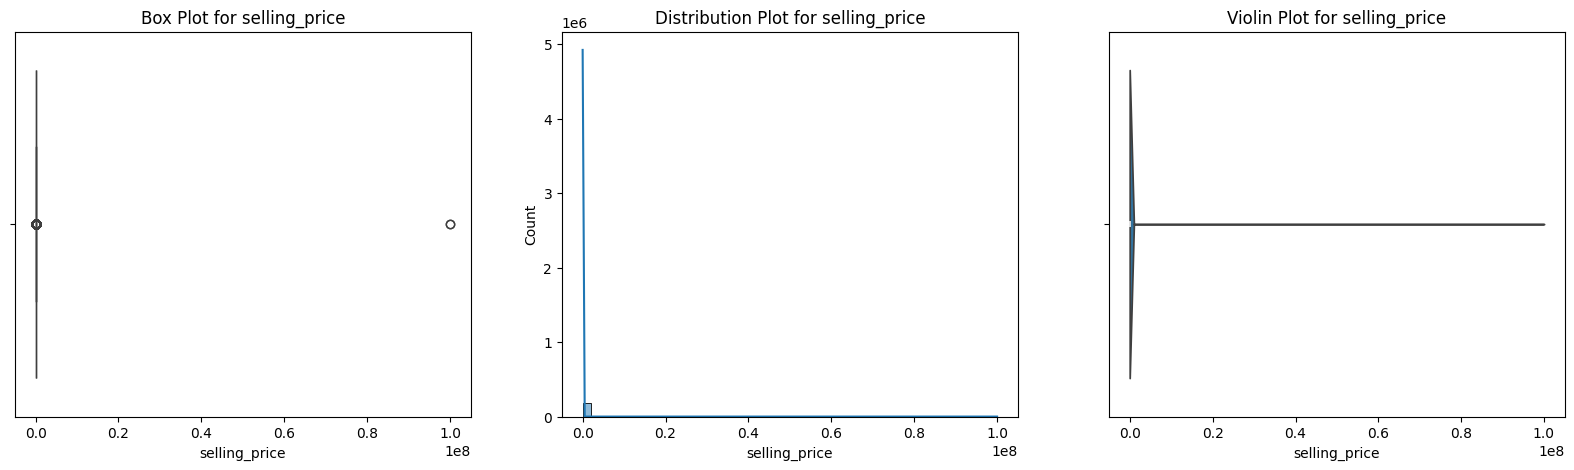

In [123]:

for i in ['quantity tons', 'customer', 'country', 'item type', 'application', 'thickness', 'width', 'selling_price']:
    plot(df, i)

In [34]:

# quantity tons, thickness and selling price data are skewd. so using the log transformation method to handle the skewness data

df1 = df.copy()
df1['quantity tons_log'] = np.log(df1['quantity tons'])
df1['thickness_log'] = np.log(df1['thickness'])
df1['selling_price_log'] = np.log(df1['selling_price'])
df1

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,delivery_date_dif,quantity tons_log,thickness_log,selling_price_log
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,91.0,3.991779,0.693147,6.749931
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00,66.0,6.643822,-0.223144,6.953684
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33,66.0,5.956169,-0.967584,6.468211
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00,66.0,5.310301,0.832909,6.643790
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00,66.0,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,1000777,164141591,2020-07-01,591.00,66.0,4.629691,-0.040822,6.381816
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,1000227,164141591,2020-07-01,589.00,66.0,5.337954,-0.051293,6.378426
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,1004216,164141591,2020-07-01,619.00,66.0,1.443523,-0.342490,6.428105
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,2020-07-02,30.365013,30200854.0,25.0,Won,W,41.0,0.85,1250.0,1001149,164141591,2020-07-01,601.00,66.0,3.413291,-0.162519,6.398595


In [35]:
# Drop the below columns because change those columns into log
df1.drop(columns=['quantity tons','thickness','selling_price'], inplace=True)
df1.head()

,id,item_date,customer,country,status,item type,application,width,material_ref,product_ref,delivery date,delivery_date_dif,quantity tons_log,thickness_log,selling_price_log
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,30156308.0,28.0,Won,W,10.0,1500.0,DEQ1 S460MC,1670798778,2021-07-01,91.0,3.991779,0.693147,6.749931
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,30202938.0,25.0,Won,W,41.0,1210.0,104991,1668701718,2021-04-01,66.0,6.643822,-0.223144,6.953684
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,30153963.0,30.0,Won,WI,28.0,952.0,S0380700,628377,2021-01-01,66.0,5.956169,-0.967584,6.468211
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,30349574.0,32.0,Won,S,59.0,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,66.0,5.310301,0.832909,6.643790
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,30211560.0,28.0,Won,W,10.0,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,66.0,6.666354,1.386294,6.357842


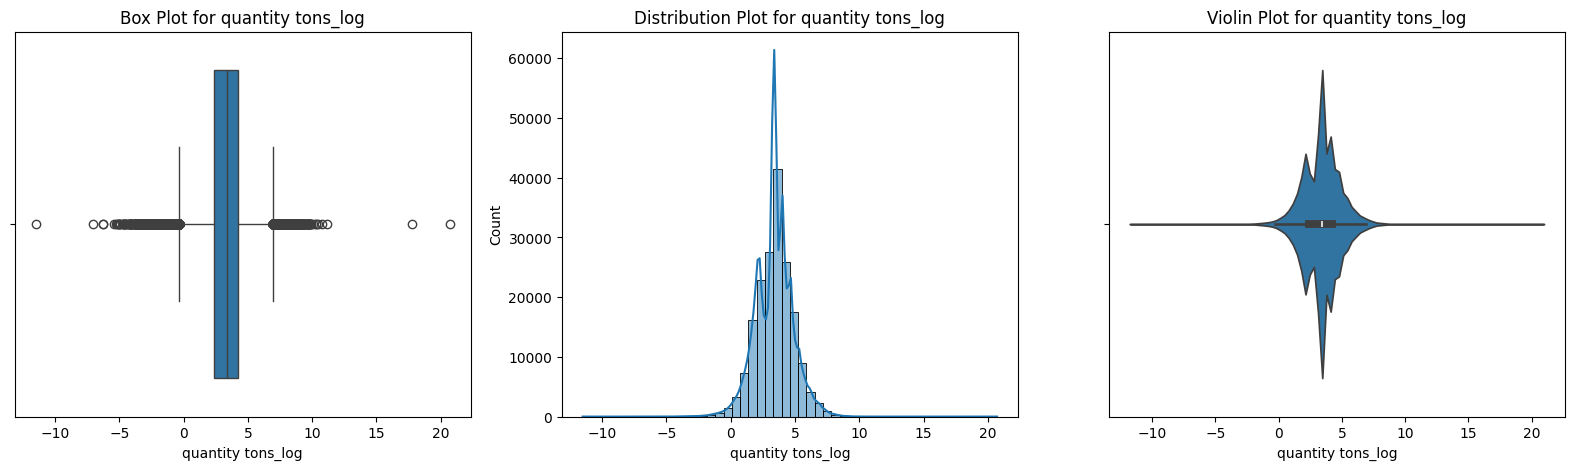

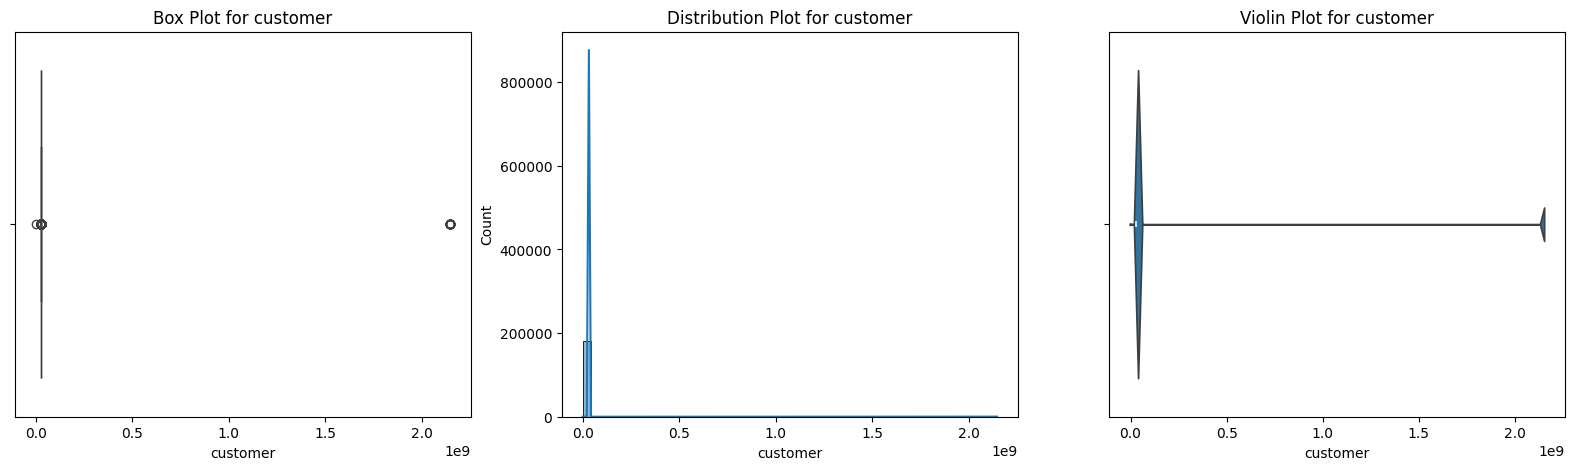

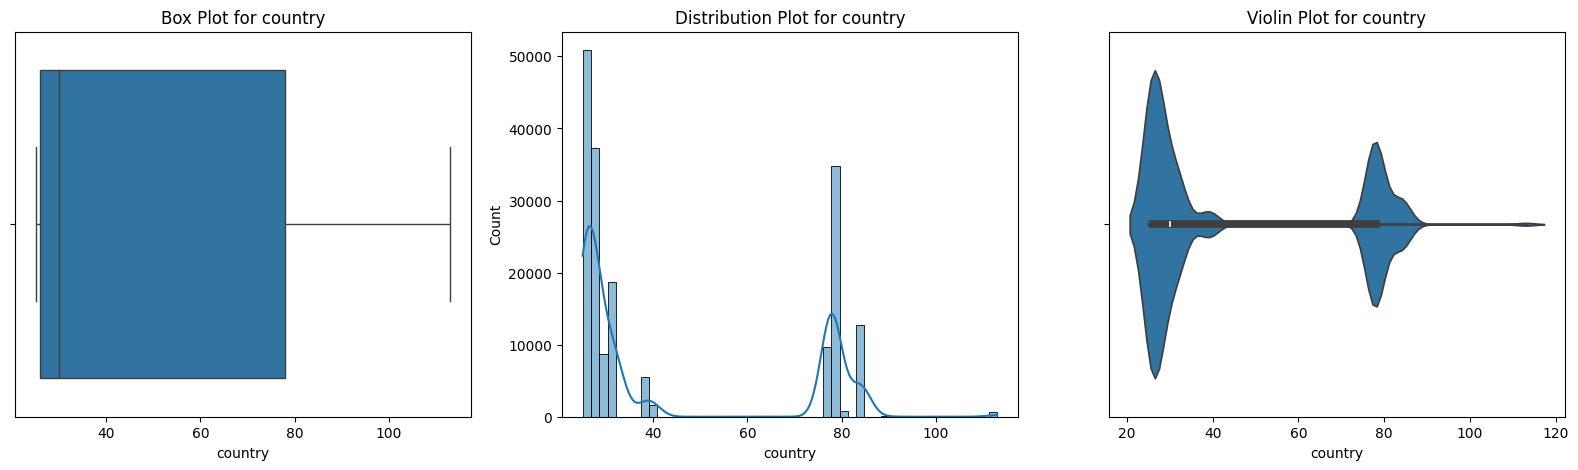

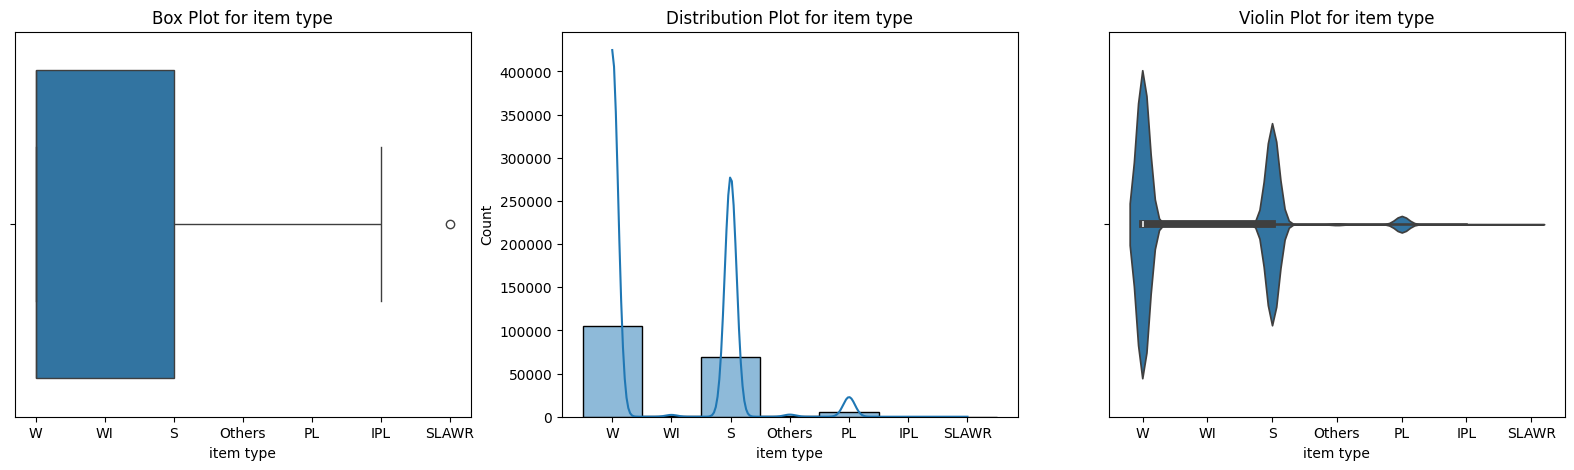

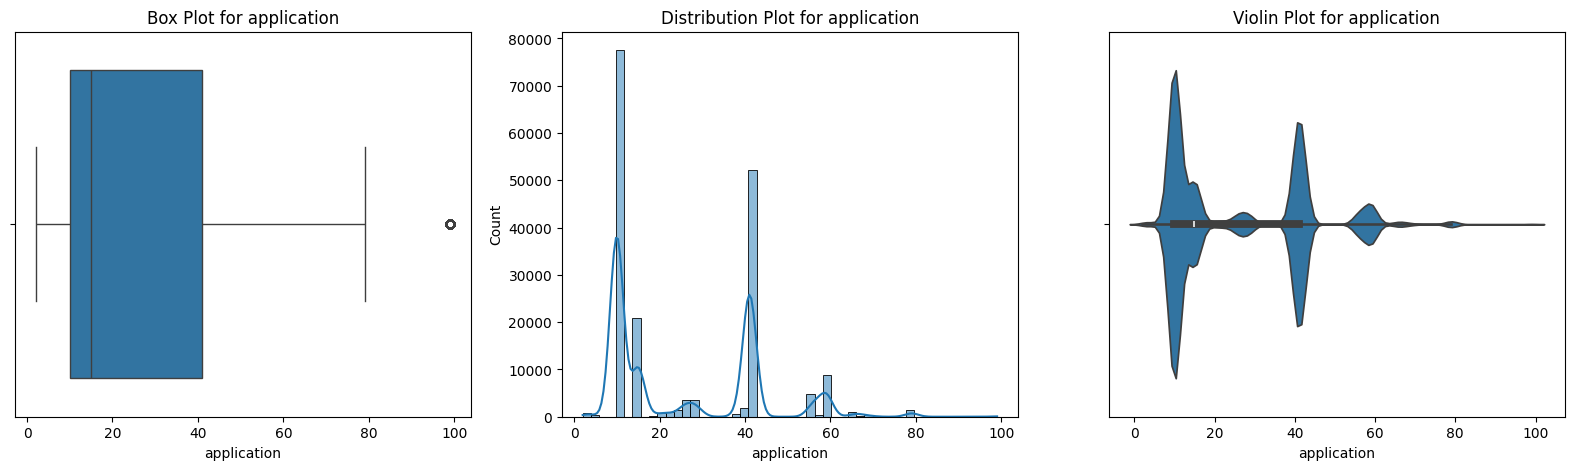

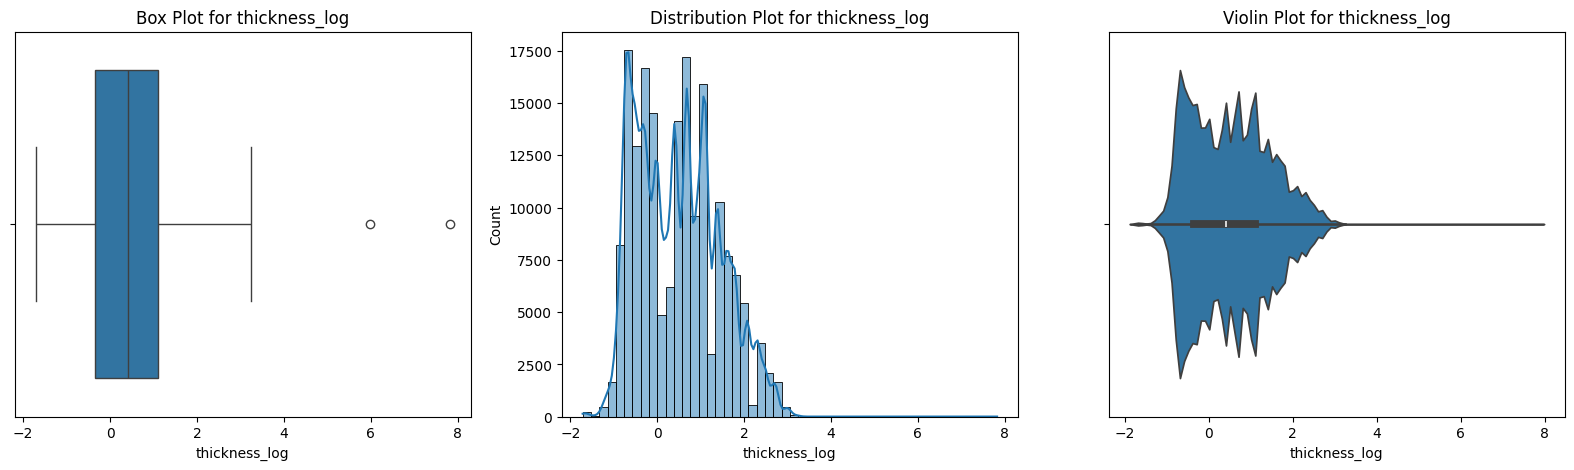

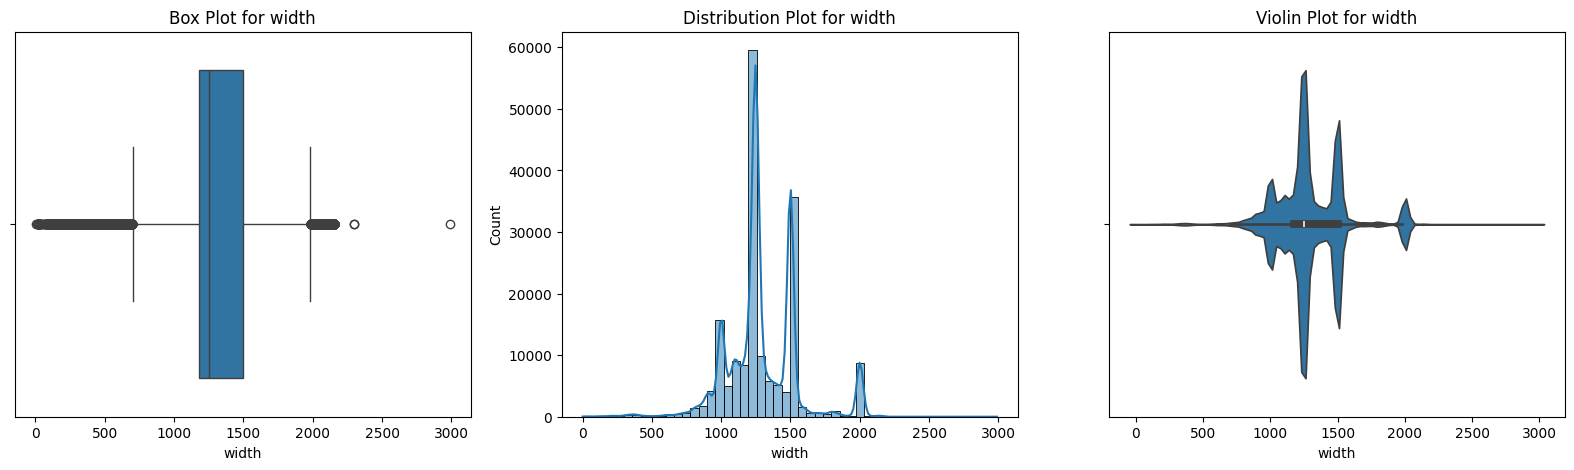

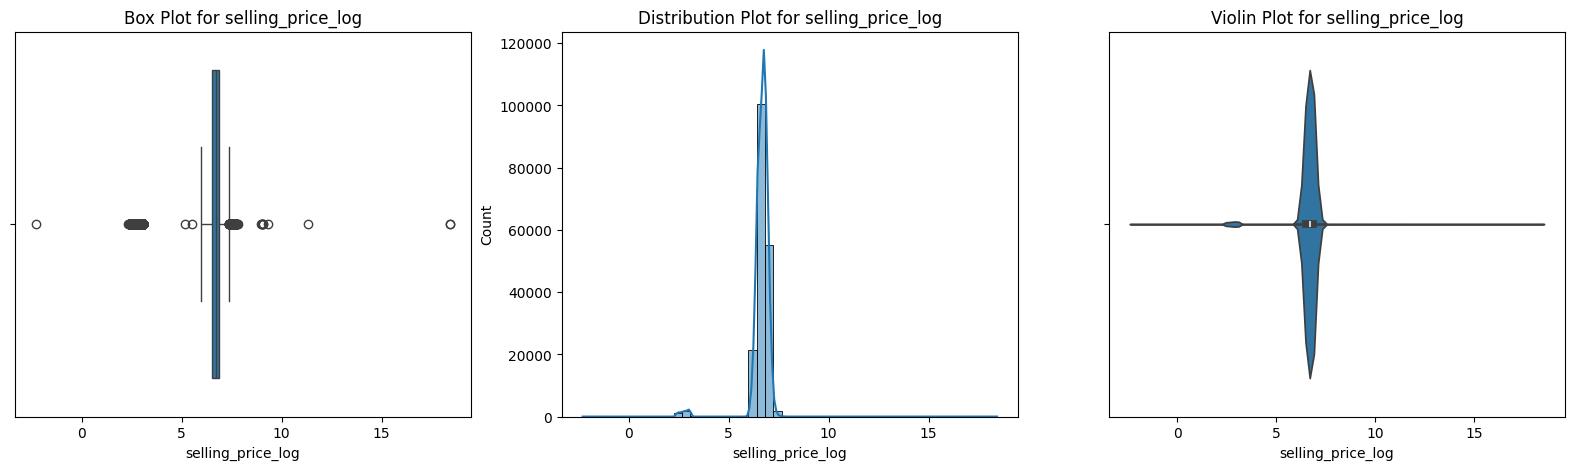

In [126]:

for i in ['quantity tons_log', 'customer', 'country', 'item type', 'application', 'thickness_log', 'width', 'selling_price_log']:
    plot(df1, i)

In [36]:
df1.describe().T

,count,mean,min,25%,50%,75%,max,std
item_date,181667,2020-11-26 22:56:12.883352832,2020-07-02 00:00:00,2020-09-29 00:00:00,2020-11-30 00:00:00,2021-02-03 00:00:00,2021-04-01 00:00:00,NaN
customer,181667.0,30512215.589904,12458.0,30196884.0,30205242.0,30280416.0,2147483647.0,24334150.416962
country,181667.0,44.890751,25.0,26.0,30.0,78.0,113.0,24.403037
application,181667.0,25.614448,2.0,10.0,15.0,41.0,99.0,17.753182
width,181667.0,1295.285308,1.0,1180.0,1250.0,1500.0,2990.0,261.63541
product_ref,181667.0,473973462.089174,611728.0,611993.0,640665.0,1332077137.0,1722207579.0,717512632.039963
delivery date,181667,2021-01-25 22:43:35.259788544,2019-04-01 00:00:00,2020-11-01 00:00:00,2021-01-01 00:00:00,2021-04-01 00:00:00,2022-01-01 00:00:00,NaN
delivery_date_dif,181667.0,68.080081,1.0,37.0,66.0,97.0,448.0,37.350754
quantity tons_log,181667.0,3.392099,-11.512925,2.39526,3.413291,4.207074,20.723266,1.444865
thickness_log,181667.0,0.480388,-1.714798,-0.356675,0.405465,1.098612,7.824046,0.933777


In [37]:

df2 = df1.copy()
df2

,id,item_date,customer,country,status,item type,application,width,material_ref,product_ref,delivery date,delivery_date_dif,quantity tons_log,thickness_log,selling_price_log
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,30156308.0,28.0,Won,W,10.0,1500.0,DEQ1 S460MC,1670798778,2021-07-01,91.0,3.991779,0.693147,6.749931
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,30202938.0,25.0,Won,W,41.0,1210.0,104991,1668701718,2021-04-01,66.0,6.643822,-0.223144,6.953684
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,30153963.0,30.0,Won,WI,28.0,952.0,S0380700,628377,2021-01-01,66.0,5.956169,-0.967584,6.468211
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,30349574.0,32.0,Won,S,59.0,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,66.0,5.310301,0.832909,6.643790
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,30211560.0,28.0,Won,W,10.0,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,66.0,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,30200854.0,25.0,Won,W,41.0,1220.0,1000777,164141591,2020-07-01,66.0,4.629691,-0.040822,6.381816
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,30200854.0,25.0,Won,W,41.0,1500.0,1000227,164141591,2020-07-01,66.0,5.337954,-0.051293,6.378426
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,30200854.0,25.0,Won,W,41.0,1250.0,1004216,164141591,2020-07-01,66.0,1.443523,-0.342490,6.428105
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,2020-07-02,30200854.0,25.0,Won,W,41.0,1250.0,1001149,164141591,2020-07-01,66.0,3.413291,-0.162519,6.398595


In [38]:
# To reduce the outliers by using clip technique
def outlier(df, column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)

In [39]:


outlier(df2, 'quantity tons_log')
outlier(df2, 'thickness_log')
outlier(df2, 'selling_price_log')
outlier(df2, 'width')
df2

,id,item_date,customer,country,status,item type,application,width,material_ref,product_ref,delivery date,delivery_date_dif,quantity tons_log,thickness_log,selling_price_log
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,30156308.0,28.0,Won,W,10.0,1500.0,DEQ1 S460MC,1670798778,2021-07-01,91.0,3.991779,0.693147,6.749931
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,30202938.0,25.0,Won,W,41.0,1210.0,104991,1668701718,2021-04-01,66.0,6.643822,-0.223144,6.953684
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,30153963.0,30.0,Won,WI,28.0,952.0,S0380700,628377,2021-01-01,66.0,5.956169,-0.967584,6.468211
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,30349574.0,32.0,Won,S,59.0,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,66.0,5.310301,0.832909,6.643790
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,30211560.0,28.0,Won,W,10.0,1980.0,2_S275JR+AR-CL1,640665,2021-03-01,66.0,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,30200854.0,25.0,Won,W,41.0,1220.0,1000777,164141591,2020-07-01,66.0,4.629691,-0.040822,6.381816
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,30200854.0,25.0,Won,W,41.0,1500.0,1000227,164141591,2020-07-01,66.0,5.337954,-0.051293,6.378426
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,30200854.0,25.0,Won,W,41.0,1250.0,1004216,164141591,2020-07-01,66.0,1.443523,-0.342490,6.428105
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,2020-07-02,30200854.0,25.0,Won,W,41.0,1250.0,1001149,164141591,2020-07-01,66.0,3.413291,-0.162519,6.398595


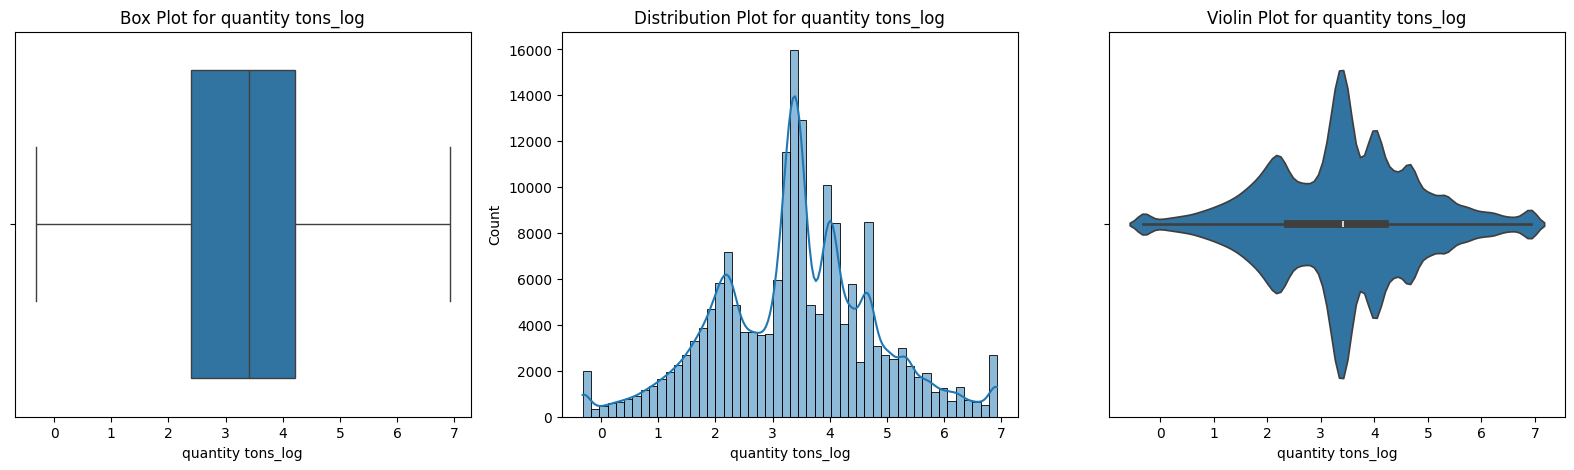

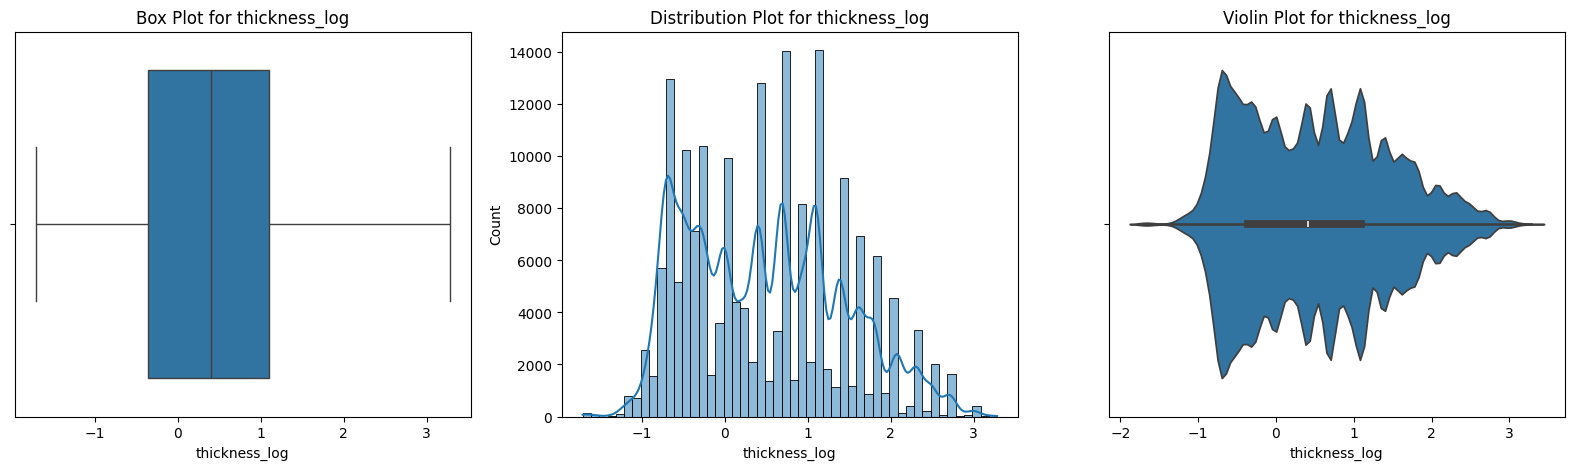

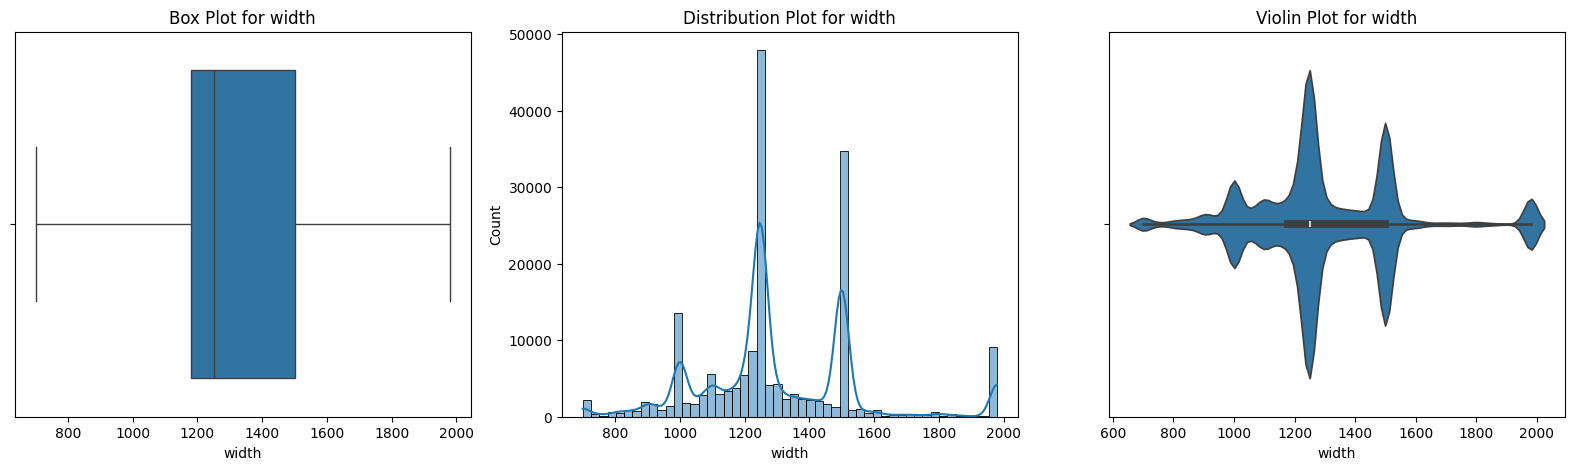

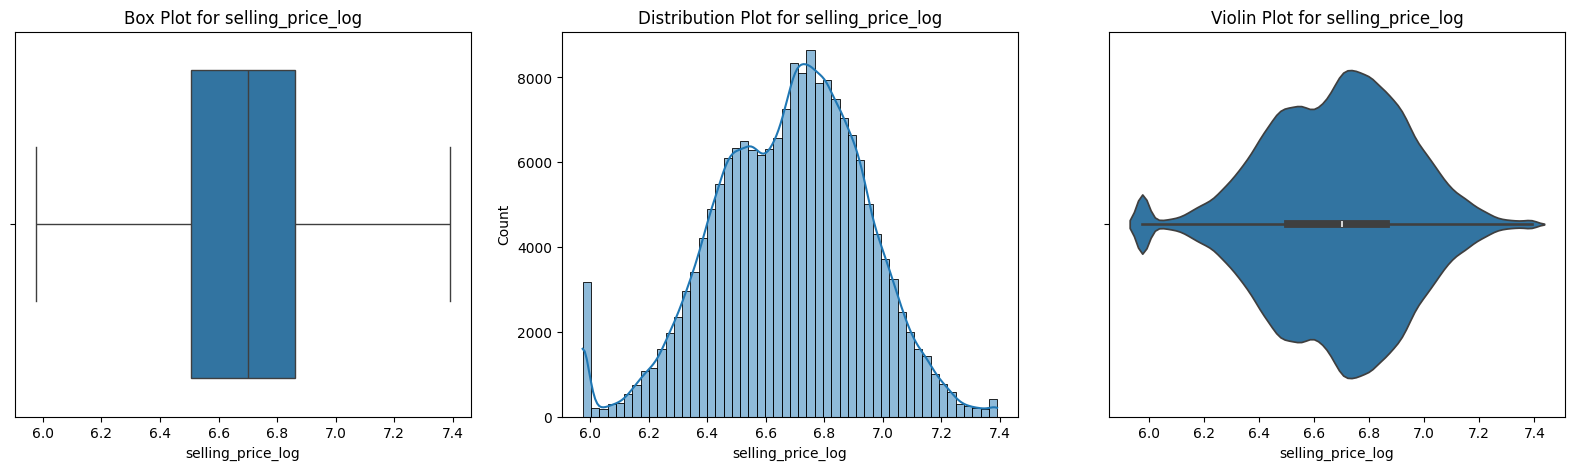

In [130]:
for i in ['quantity tons_log', 'thickness_log', 'width', 'selling_price_log']:
    plot(df2, i)

<Axes: >

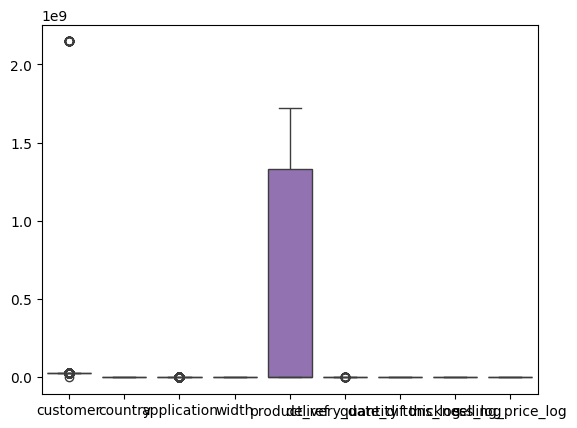

In [132]:
sns.boxplot(data = df2)

In [40]:
df2.describe().T

,count,mean,min,25%,50%,75%,max,std
item_date,181667,2020-11-26 22:56:12.883352832,2020-07-02 00:00:00,2020-09-29 00:00:00,2020-11-30 00:00:00,2021-02-03 00:00:00,2021-04-01 00:00:00,NaN
customer,181667.0,30512215.589904,12458.0,30196884.0,30205242.0,30280416.0,2147483647.0,24334150.416962
country,181667.0,44.890751,25.0,26.0,30.0,78.0,113.0,24.403037
application,181667.0,25.614448,2.0,10.0,15.0,41.0,99.0,17.753182
width,181667.0,1297.044225,700.0,1180.0,1250.0,1500.0,1980.0,248.965355
product_ref,181667.0,473973462.089174,611728.0,611993.0,640665.0,1332077137.0,1722207579.0,717512632.039963
delivery date,181667,2021-01-25 22:43:35.259788544,2019-04-01 00:00:00,2020-11-01 00:00:00,2021-01-01 00:00:00,2021-04-01 00:00:00,2022-01-01 00:00:00,NaN
delivery_date_dif,181667.0,68.080081,1.0,37.0,66.0,97.0,448.0,37.350754
quantity tons_log,181667.0,3.392937,-0.322461,2.39526,3.413291,4.207074,6.924795,1.394643
thickness_log,181667.0,0.480348,-1.714798,-0.356675,0.405465,1.098612,3.281543,0.933574


<Axes: >

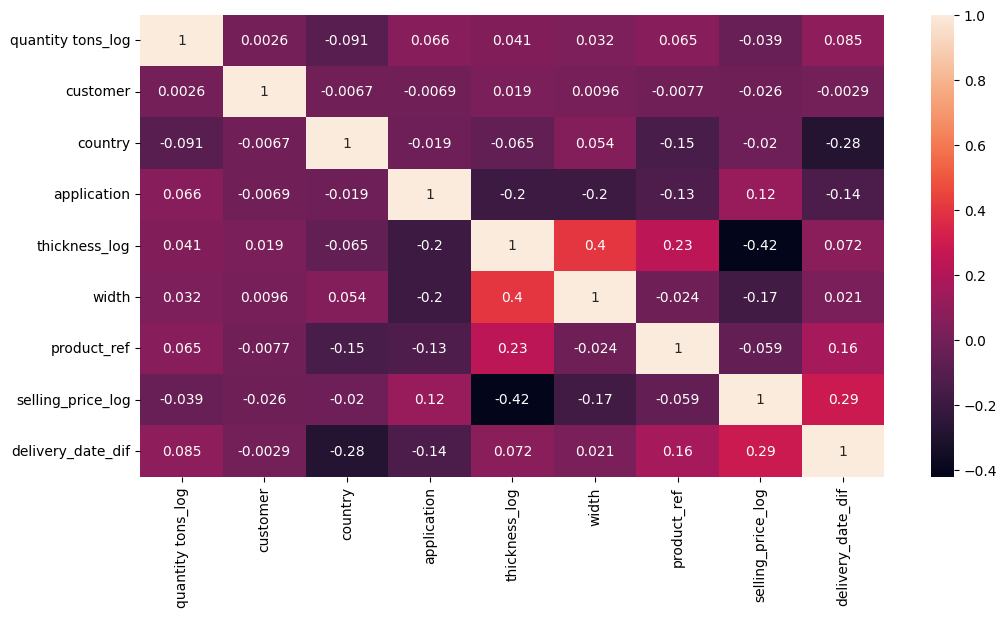

In [41]:
# Covariance Heatmap
cor=df2[['quantity tons_log', 'customer', 'country', 'application', 'thickness_log', 'width','product_ref', 'selling_price_log','delivery_date_dif']].corr()

plt.figure(figsize=(12,6))
sns.heatmap(cor,annot=True)

In [42]:
df3=df2.copy()
df3

,id,item_date,customer,country,status,item type,application,width,material_ref,product_ref,delivery date,delivery_date_dif,quantity tons_log,thickness_log,selling_price_log
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,30156308.0,28.0,Won,W,10.0,1500.0,DEQ1 S460MC,1670798778,2021-07-01,91.0,3.991779,0.693147,6.749931
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,30202938.0,25.0,Won,W,41.0,1210.0,104991,1668701718,2021-04-01,66.0,6.643822,-0.223144,6.953684
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,30153963.0,30.0,Won,WI,28.0,952.0,S0380700,628377,2021-01-01,66.0,5.956169,-0.967584,6.468211
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,30349574.0,32.0,Won,S,59.0,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,66.0,5.310301,0.832909,6.643790
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,30211560.0,28.0,Won,W,10.0,1980.0,2_S275JR+AR-CL1,640665,2021-03-01,66.0,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,30200854.0,25.0,Won,W,41.0,1220.0,1000777,164141591,2020-07-01,66.0,4.629691,-0.040822,6.381816
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,30200854.0,25.0,Won,W,41.0,1500.0,1000227,164141591,2020-07-01,66.0,5.337954,-0.051293,6.378426
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,30200854.0,25.0,Won,W,41.0,1250.0,1004216,164141591,2020-07-01,66.0,1.443523,-0.342490,6.428105
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,2020-07-02,30200854.0,25.0,Won,W,41.0,1250.0,1001149,164141591,2020-07-01,66.0,3.413291,-0.162519,6.398595


In [43]:
df3['status'].value_counts()

status
Won                116009
Lost                34436
Not lost for AM     19573
Revised              4276
To be approved       4169
Draft                3140
Offered                53
Offerable              10
Wonderful               1
Name: count, dtype: int64

In [44]:
# Mapping the status to train it in ML
df3["status"]= df3["status"].map({'Won':1, 'Draft':2, 'To be approved':3, 'Lost':0, 'Not lost for AM':4,
                                'Wonderful':5, 'Revised':6, 'Offered':7, 'Offerable':8})
df3['status'].unique()

array([1, 2, 3, 0, 4, 5, 6, 7, 8], dtype=int64)

In [45]:
df3['status'].value_counts()

status
1    116009
0     34436
4     19573
6      4276
3      4169
2      3140
7        53
8        10
5         1
Name: count, dtype: int64

In [46]:
df3['item type'].value_counts()

item type
W         105614
S          69231
PL          5660
Others       610
WI           524
IPL           27
SLAWR          1
Name: count, dtype: int64

In [47]:
# Encoding the status to use it in ML
from sklearn.preprocessing import OrdinalEncoder
df3["item type"]= OrdinalEncoder().fit_transform(df3[["item type"]])
df3['item type'].unique()

array([5., 6., 3., 1., 2., 0., 4.])

In [66]:
df3['item type'].value_counts()

item type
5.0    105614
3.0     69231
2.0      5660
1.0       610
6.0       524
0.0        27
4.0         1
Name: count, dtype: int64

In [143]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/99.8 MB 1.1 MB/s eta 0:01:32
   ---------------------------------------- 0.2/99.8 MB 1.7 MB/s eta 0:01:01
   ---------------------------------------- 0.3/99.8 MB 2.0 MB/s eta 0:00:51
   ---------------------------------------- 0.4/99.8 MB 2.3 MB/s eta 0:00:43
   ---------------------------------------- 0.5/99.8 MB 2.4 MB/s eta 0:00:42
   ---------------------------------------- 0.7/99.8 MB 2.7 MB/s eta 0:00:38
   ---------------------------------------- 0.8/99.8 MB 2.5 MB/s eta 0:00:41
   ---------------------------------------- 0.9/99.8 MB 2.5 MB/s eta 0:00:41
   ---------------------------------------- 1.1/99.8 MB 2.7 MB/s eta 0:00:37
   ---------------------------------------- 1.2/99.8 MB 2.7 MB/s eta 0:00:37
    --------

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor


from sklearn import metrics
import numpy as np

In [49]:
df4=df3.copy()
df4

,id,item_date,customer,country,status,item type,application,width,material_ref,product_ref,delivery date,delivery_date_dif,quantity tons_log,thickness_log,selling_price_log
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,30156308.0,28.0,1,5.0,10.0,1500.0,DEQ1 S460MC,1670798778,2021-07-01,91.0,3.991779,0.693147,6.749931
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,30202938.0,25.0,1,5.0,41.0,1210.0,104991,1668701718,2021-04-01,66.0,6.643822,-0.223144,6.953684
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,30153963.0,30.0,1,6.0,28.0,952.0,S0380700,628377,2021-01-01,66.0,5.956169,-0.967584,6.468211
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,30349574.0,32.0,1,3.0,59.0,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,66.0,5.310301,0.832909,6.643790
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,30211560.0,28.0,1,5.0,10.0,1980.0,2_S275JR+AR-CL1,640665,2021-03-01,66.0,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,30200854.0,25.0,1,5.0,41.0,1220.0,1000777,164141591,2020-07-01,66.0,4.629691,-0.040822,6.381816
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,30200854.0,25.0,1,5.0,41.0,1500.0,1000227,164141591,2020-07-01,66.0,5.337954,-0.051293,6.378426
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,30200854.0,25.0,1,5.0,41.0,1250.0,1004216,164141591,2020-07-01,66.0,1.443523,-0.342490,6.428105
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,2020-07-02,30200854.0,25.0,1,5.0,41.0,1250.0,1001149,164141591,2020-07-01,66.0,3.413291,-0.162519,6.398595


In [50]:
# Drop the unwanted columns to train the model
df4.drop(columns=['id','item_date','delivery date','material_ref'], inplace=True)
df4

,customer,country,status,item type,application,width,product_ref,delivery_date_dif,quantity tons_log,thickness_log,selling_price_log
0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,91.0,3.991779,0.693147,6.749931
1,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,66.0,6.643822,-0.223144,6.953684
2,30153963.0,30.0,1,6.0,28.0,952.0,628377,66.0,5.956169,-0.967584,6.468211
3,30349574.0,32.0,1,3.0,59.0,1317.0,1668701718,66.0,5.310301,0.832909,6.643790
4,30211560.0,28.0,1,5.0,10.0,1980.0,640665,66.0,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...
181668,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,66.0,4.629691,-0.040822,6.381816
181669,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,66.0,5.337954,-0.051293,6.378426
181670,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,66.0,1.443523,-0.342490,6.428105
181671,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,66.0,3.413291,-0.162519,6.398595


In [152]:

def best_ML_algorithm(df, algorithms):
    x = df.drop(columns=['selling_price_log'], axis=1) # choosing the features
    y = df['selling_price_log'] # Choosing the Traget

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42) # Split the data for train and test the model

    results = {}

# choosing the best algorith which suits for data
    for algorithm in algorithms:
        model = algorithm().fit(x_train, y_train)
        y_pred = model.predict(x_test)
        MAE = metrics.mean_absolute_error(y_test, y_pred)
        MSE = metrics.mean_squared_error(y_test, y_pred)
        RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
        r2 = metrics.r2_score(y_test, y_pred)

        results[algorithm.__name__] = {
            'Mean Absolute Error': MAE,
            'Mean Squared Error': MSE,
            'Root Mean Squared Error': RMSE,
            'R² score': r2
        }

        print(f"**Evaluation Metrics for {algorithm.__name__}:**")
        print(f"Mean Absolute Error: {MAE}")
        print(f"Mean Squared Error: {MSE}")
        print(f"Root Mean Squared Error: {RMSE}")
        print(f"R² score: {r2}")
        print()

    best_algorithm = max(results.items(), key=lambda item: item[1]['R² score'])[0]

    return best_algorithm, results

#algorithm used for checking
algorithms = [
    LinearRegression, DecisionTreeRegressor, ExtraTreesRegressor, RandomForestRegressor,
    GradientBoostingRegressor, XGBRegressor
]

best_algorithm, results = best_ML_algorithm(df4, algorithms)

results_df = pd.DataFrame(results).transpose()

print("**Evaluation Metrics for All Algorithms:**")
print(results_df.to_string())

print("**Best Algorithm:**", best_algorithm)

**Evaluation Metrics for LinearRegression:**
Mean Absolute Error: 0.16418154901756343
Mean Squared Error: 0.045976521004814794
Root Mean Squared Error: 0.2144213632192809
R² score: 0.29517184901878435

**Evaluation Metrics for DecisionTreeRegressor:**
Mean Absolute Error: 0.053450608522740736
Mean Squared Error: 0.009870249005554214
Root Mean Squared Error: 0.09934912684847419
R² score: 0.8486873472749185

**Evaluation Metrics for ExtraTreesRegressor:**
Mean Absolute Error: 0.0462281390451693
Mean Squared Error: 0.005703016307767155
Root Mean Squared Error: 0.07551831769688169
R² score: 0.9125717572497863

**Evaluation Metrics for RandomForestRegressor:**
Mean Absolute Error: 0.045554769754942305
Mean Squared Error: 0.005420637220379436
Root Mean Squared Error: 0.0736249768786343
R² score: 0.9169006783096988

**Evaluation Metrics for GradientBoostingRegressor:**
Mean Absolute Error: 0.11776120425242051
Mean Squared Error: 0.021358643269008264
Root Mean Squared Error: 0.1461459656268631

Getting the result as best algorithm is RandomForestREgressor
so further using hyperparameter tuning selecting the best parameteres to train the model


In [ ]:
from sklearn.model_selection import GridSearchCV
x = df4.drop(columns=['selling_price_log'], axis=1)
y = df4['selling_price_log']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Example for RandomForestRegressor
param_grid = {
    'n_estimators': [50, 100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=3, scoring='r2', verbose=2, n_jobs=4)
grid_search.fit(x_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
# I run it in Colab due to system isuue
# It take around 75 Mins 

In [51]:
# By using the parameters getting from gridsearchCV we train a model by the params

x = df4.drop(columns=['selling_price_log'], axis=1)
y = df4['selling_price_log']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

model=RandomForestRegressor(n_estimators=100,random_state=42,max_depth=20,max_features= None ,min_samples_leaf=1,min_samples_split=2)
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

MAE=metrics.mean_absolute_error(y_test,y_pred)
MSE=metrics.mean_squared_error(y_test,y_pred)
RMSE=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
r2=metrics.r2_score(y_test,y_pred)

print(f"Mean Absolute Error: {MAE}")
print(f"Mean Squared Error : {MSE}")
print(f"Root Mean Squared Error: {RMSE}")
print(f"R-Squared: {r2}")

Mean Absolute Error: 0.04846258381463637
Mean Squared Error : 0.0057094279815326394
Root Mean Squared Error: 0.0755607568882991
R-Squared: 0.9128433823457647


In [52]:
df4.head()

,customer,country,status,item type,application,width,product_ref,delivery_date_dif,quantity tons_log,thickness_log,selling_price_log
0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,91.0,3.991779,0.693147,6.749931
1,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,66.0,6.643822,-0.223144,6.953684
2,30153963.0,30.0,1,6.0,28.0,952.0,628377,66.0,5.956169,-0.967584,6.468211
3,30349574.0,32.0,1,3.0,59.0,1317.0,1668701718,66.0,5.310301,0.832909,6.643790
4,30211560.0,28.0,1,5.0,10.0,1980.0,640665,66.0,6.666354,1.386294,6.357842


In [53]:
# Checking the accuracy manually
user_data = np.array([[30202938,25,1,5,41,1210,1668701718,66.0,6.643822,-0.223144]])

y_pred = model.predict(user_data)
y_pred[0]

6.885049132120568

In [54]:
np.exp(y_pred[0])

977.549697618483

In [55]:
# store it in a pickle file
with open('regression_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [56]:
with open(r'C:\Users\HP\Desktop\New folder\regression_model.pkl', 'rb') as f:
    model = pickle.load(f)

y_pred = model.predict(np.array([[30202938,25,1,5,41,1210,1668701718,66.0,6.643822,-0.223144]]))
np.exp(y_pred[0])

977.549697618483

In [57]:

# Taken only won and loss from the status
df_c = df4.copy()

# filter the status column values only 1 & 0 rows in a new dataframe ['Won':1 & 'Lost':0]
df_c = df_c[(df_c.status == 1) | (df_c.status == 0)]
df_c
     

,customer,country,status,item type,application,width,product_ref,delivery_date_dif,quantity tons_log,thickness_log,selling_price_log
0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,91.0,3.991779,0.693147,6.749931
1,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,66.0,6.643822,-0.223144,6.953684
2,30153963.0,30.0,1,6.0,28.0,952.0,628377,66.0,5.956169,-0.967584,6.468211
3,30349574.0,32.0,1,3.0,59.0,1317.0,1668701718,66.0,5.310301,0.832909,6.643790
4,30211560.0,28.0,1,5.0,10.0,1980.0,640665,66.0,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...
181668,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,66.0,4.629691,-0.040822,6.381816
181669,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,66.0,5.337954,-0.051293,6.378426
181670,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,66.0,1.443523,-0.342490,6.428105
181671,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,66.0,3.413291,-0.162519,6.398595


In [58]:
x = df_c.drop(columns=['status'], axis=1)
y = df_c['status']



In [59]:
# data is oversampled so using SMOTE we balanced it
from imblearn.over_sampling import SMOTE


smote = SMOTE()  # Create an instance of SMOTE


x_train_smote, y_train_smote = smote.fit_resample(x, y) 

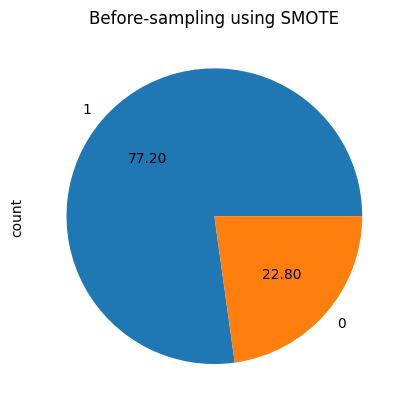

In [81]:
ax = y_train.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Before-sampling using SMOTE")

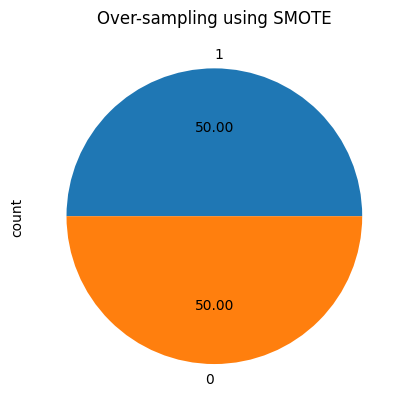

In [82]:
ax = y_train_smote.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling using SMOTE")

In [83]:
y_train_smote.value_counts()

status
1    116009
0    116009
Name: count, dtype: int64

In [60]:

from imblearn.combine import SMOTETomek
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import pickle
     

In [87]:
# choosing the best algorithm
def best_ML_class_algorithm(x_train_smote,y_train_smote,algorithms):
    
    # Split the data for train and test
    x_train, x_test, y_train, y_test = train_test_split(x_train_smote, y_train_smote, test_size=0.3, random_state=42)

    results = {}

    for algorithm in algorithms:
        model = algorithm().fit(x_train, y_train)
        y_pred = model.predict(x_test)
        accuracy = metrics.accuracy_score(y_test,y_pred)
        precision = metrics.precision_score(y_test,y_pred)
        recall = metrics.recall_score(y_test,y_pred)
        f1=metrics.f1_score(y_test,y_pred)

        results[algorithm.__name__] = {
            'Accuracy score': accuracy,
            'Precision score': precision,
            'Recall score': recall,
            'F1 score': f1
        }

        print(f"**Evaluation Metrics for {algorithm.__name__}:**")
        print(f"Mean Absolute Error: {accuracy}")
        print(f"Mean Squared Error: {precision}")
        print(f"Root Mean Squared Error: {recall}")
        print(f"R² score: {f1}")
        print()

    best_algorithm = max(results.items(), key=lambda item: item[1]['Accuracy score'])[0]

    return best_algorithm, results

algorithms = [
    LogisticRegression, DecisionTreeClassifier, ExtraTreesClassifier, RandomForestClassifier,
    AdaBoostClassifier, GradientBoostingClassifier, XGBClassifier
]

best_algorithm, results = best_ML_class_algorithm(x_train_smote,y_train_smote, algorithms)

results_df = pd.DataFrame(results).transpose()

print("**Evaluation Metrics for All Algorithms:**")
print(results_df.to_string())

print("**Best Algorithm:**", best_algorithm)

**Evaluation Metrics for LogisticRegression:**
Mean Absolute Error: 0.5426831020314341
Mean Squared Error: 0.5293323514973
Root Mean Squared Error: 0.7457636887608069
R² score: 0.6191797865722353

**Evaluation Metrics for DecisionTreeClassifier:**
Mean Absolute Error: 0.9553199436830159
Mean Squared Error: 0.9573223695639586
Root Mean Squared Error: 0.9528530259365994
R² score: 0.9550824691643317

**Evaluation Metrics for ExtraTreesClassifier:**
Mean Absolute Error: 0.9764819124788093
Mean Squared Error: 0.987238055940346
Root Mean Squared Error: 0.9653025936599423
R² score: 0.9761471098223783

**Evaluation Metrics for RandomForestClassifier:**
Mean Absolute Error: 0.9745567910812286
Mean Squared Error: 0.98526334404197
Root Mean Squared Error: 0.963371757925072
R² score: 0.9741945824651387

**Evaluation Metrics for AdaBoostClassifier:**
Mean Absolute Error: 0.7630233025888573
Mean Squared Error: 0.7726033961247043
Root Mean Squared Error: 0.7434582132564842
R² score: 0.757750657208735

From that process am getting ExtraTeesClassifier as best Algorithm
so i choosing parameter using GridsearchCV

In [88]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x_train_smote, y_train_smote, test_size=0.3, random_state=42)

# Define the parameter grid for ExtraTreesClassifier
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20, 25],
    'min_samples_split': [2,4],
    'min_samples_leaf': [1, 2],
    
}

 # Set up GridSearchCV
grid_search = GridSearchCV(ExtraTreesClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(x_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_

Best parameters: {'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x_train_smote, y_train_smote, test_size=0.3, random_state=42)

model=ExtraTreesClassifier(n_estimators=50,random_state=42,max_depth=25,min_samples_leaf=1,min_samples_split=2)
model.fit(x_train,y_train) # Train a data

y_pred=model.predict(x_test) # Test a data

accuracy = metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)
f1=metrics.f1_score(y_test,y_pred)

print(f"Mean Absolute Error: {accuracy}")
print(f"Mean Squared Error : {precision}")
print(f"Root Mean Squared Error: {recall}")
print(f"R-Squared: {f1}")

Mean Absolute Error: 0.9634801597563428
Mean Squared Error : 0.9885155253083794
Root Mean Squared Error: 0.9376368876080692
R-Squared: 0.9624042358091519


In [62]:
df_c.head()

,customer,country,status,item type,application,width,product_ref,delivery_date_dif,quantity tons_log,thickness_log,selling_price_log
0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,91.0,3.991779,0.693147,6.749931
1,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,66.0,6.643822,-0.223144,6.953684
2,30153963.0,30.0,1,6.0,28.0,952.0,628377,66.0,5.956169,-0.967584,6.468211
3,30349574.0,32.0,1,3.0,59.0,1317.0,1668701718,66.0,5.310301,0.832909,6.643790
4,30211560.0,28.0,1,5.0,10.0,1980.0,640665,66.0,6.666354,1.386294,6.357842


In [63]:
# Cross checking manually
user_data = np.array([[30156308,28,1,5,10,1500,1670798778,91.0,3.991779,6.749931]])

y_pred = model.predict(user_data)
if y_pred[0]==1:
    print("Won")
else:
    print("Loss")

Won


In [64]:
import pickle
# Store it as pickle file
with open('classification_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [65]:
with open(r'C:\Users\HP\Desktop\New folder\classification_model.pkl', 'rb') as f:
    model = pickle.load(f)

y_pred = model.predict(np.array([[30156308,28,1,5,10,1500,1670798778,91.0,3.991779,6.749931]]))
if y_pred[0]==1:
    print("Won")
else:
    print("Loss")

Won
